# Integration of Python and R
Why we need to lenguages, both support important featuares and complementaries, for instance, python is a big general programming language, but otherwise R have more extensible export functions and statistical features.

In [16]:

import pandas as pd
import rpy2.robjects as robjects
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [4]:
## Creating a dataset for uses and plotting in the languagues
import numpy as np

x = np.linspace(1,100,100)
y = x.copy()
x = list(x)
type(x)
df = pd.DataFrame(x, columns=['x'])
df['y']  = df['x']**2
print(df)

        x        y
0     1.0      1.0
1     2.0      4.0
2     3.0      9.0
3     4.0     16.0
4     5.0     25.0
..    ...      ...
95   96.0   9216.0
96   97.0   9409.0
97   98.0   9604.0
98   99.0   9801.0
99  100.0  10000.0

[100 rows x 2 columns]


[1] "list"



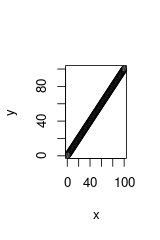

In [5]:
%%R -i x,y -w 2 -h 3 --units in -r 80
#note has pass from x and y 
print(class(x))
install.packages("ggplot2")
plot(x,y)

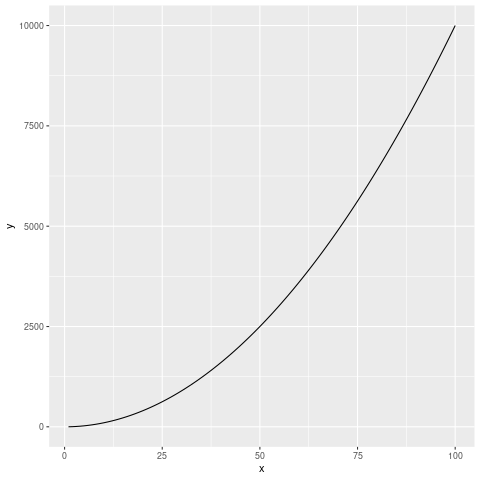

In [6]:
%%R -i df
library("ggplot2")
ggplot(df, aes(x=x, y=y)) + geom_line()
#Note that we defined the variables in python but we are render the graph in R.

## automatic translation of pandas objects to R
from rpy2.objects() import pandas2ri
pandas2ri.activate()
% R line magic
%%R cell magic
-i input variables
-o output variables
-h height of plot 
-w width of plot


In [7]:
%%R
R.version

               _                           
platform       x86_64-redhat-linux-gnu     
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.2                         
year           2020                        
month          06                          
day            22                          
svn rev        78730                       
language       R                           
version.string R version 4.0.2 (2020-06-22)
nickname       Taking Off Again            


To convert explicitly, the functions are pandas2ri.py2ri() and pandas2ri.ri2py().
Once the pandas conversion is activated (pandas2ri.activate()), many conversions of R to pandas objects will be done automatically. For example, to obtain the ‘iris’ dataset as a pandas DataFrame:

If the pandas conversion was not activated, the above could also be accomplished by explicitly conv 

In [26]:
%%R -o df2
salario = c(10,30,40)
edad = c(29,40,84)
df2 =data.frame(salario, edad)


[1] "data.frame"


In [29]:
type(df2)  # note the automatic converstion to pandas.  and i was declared a pandas to be used as iput


pandas.core.frame.DataFrame